In [684]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

xlsx_name = "final.xlsx"
list_all_sheets = pandas.ExcelFile(xlsx_name).sheet_names
print(list_all_sheets)

['FGYFNQ', 'ODTW0O', 'BV1ZP4Y1', 'BV1Vu4y', 'BV1kN4y', 'WFA7GAV', 'IZAKqI3', 'BV1aK41', 'BV1H14y', 'kxUvN7', 'BV1WV41']


In [685]:
# read all sheets
dict_all_sheets = {}
for sheet in list_all_sheets:
    df = pandas.read_excel(xlsx_name, sheet_name=sheet)
    print(f"sheet {sheet} has shape {df.shape}")
    dict_all_sheets[sheet] = df.iloc[:, :11]
    print(f"sheet {sheet} has shape {dict_all_sheets[sheet].shape}")

sheet FGYFNQ has shape (55, 11)
sheet FGYFNQ has shape (55, 11)
sheet ODTW0O has shape (31, 11)
sheet ODTW0O has shape (31, 11)
sheet BV1ZP4Y1 has shape (104, 11)
sheet BV1ZP4Y1 has shape (104, 11)
sheet BV1Vu4y has shape (42, 11)
sheet BV1Vu4y has shape (42, 11)
sheet BV1kN4y has shape (40, 11)
sheet BV1kN4y has shape (40, 11)
sheet WFA7GAV has shape (6, 11)
sheet WFA7GAV has shape (6, 11)
sheet IZAKqI3 has shape (41, 11)
sheet IZAKqI3 has shape (41, 11)
sheet BV1aK41 has shape (16, 11)
sheet BV1aK41 has shape (16, 11)
sheet BV1H14y has shape (61, 11)
sheet BV1H14y has shape (61, 11)
sheet kxUvN7 has shape (19, 11)
sheet kxUvN7 has shape (19, 11)
sheet BV1WV41 has shape (48, 11)
sheet BV1WV41 has shape (48, 11)


In [686]:
# merge all sheets, and remove names of the sheets
df = pandas.concat(dict_all_sheets, ignore_index=True)
print(f"all sheets have shape {df.shape}") 
df.head()

all sheets have shape (463, 11)


,kill/dead,run-0-1,hp-0-1-2,ammo-0-1,enemy-see-0-1,enemy-fire-0-1,F-cov-smk-0-1,SB-cov-smk-0-1,near-team-0-1,frontline-0-1-2,pos-tw-e-0-1-2
0,1,0,2,1,0,0,1,0,1,0,0
1,1,1,2,1,0,0,0,0,0,1,1
2,1,1,1,1,0,0,1,1,0,1,2
3,1,1,1,0,1,0,0,1,1,0,0
4,2,1,2,1,0,0,0,1,0,2,1


# Histogram of kills

In [687]:
# get kd of the players
kills = sum(df["kill/dead"])

1    289
2     91
3     47
4     20
5      9
6      7
Name: kill/dead, dtype: int64


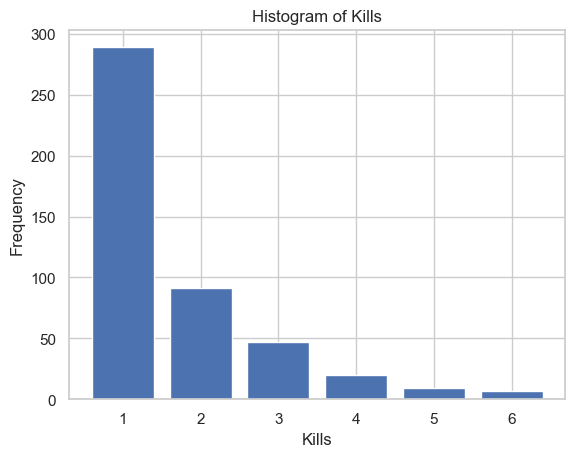

In [688]:
kd_unique = df["kill/dead"].value_counts()
kd_unique = kd_unique.sort_index()
print(kd_unique)
plt.bar(kd_unique.index, kd_unique.values)
plt.title('Histogram of Kills')
plt.xlabel('Kills')
plt.ylabel('Frequency')
plt.show()


In [689]:
# about multiple kills
multiple_kills = df[df["kill/dead"] > 1]
print(f"multiple_kills has shape {multiple_kills.shape}, #multiple_kills/#kills: {multiple_kills.shape[0]/kills}")
multiple_kills_sum = sum(multiple_kills["kill/dead"])
print(f"multiple_kills_sum: {multiple_kills_sum}, multiple_kills_sum/kills: {multiple_kills_sum/kills}")

multiple_kills has shape (174, 11), #multiple_kills/#kills: 0.2233632862644416
multiple_kills_sum: 490, multiple_kills_sum/kills: 0.6290115532734275


# enemy's attention and kills


In [690]:
kills_df = df[df["kill/dead"] > 0]

sum_00 = kills_df[(kills_df['enemy-see-0-1'] == 0) & (kills_df['enemy-fire-0-1'] == 0)]['kill/dead'].sum()
sum_01 = kills_df[(kills_df['enemy-see-0-1'] == 0) & (kills_df['enemy-fire-0-1'] == 1)]['kill/dead'].sum()
sum_10 = kills_df[(kills_df['enemy-see-0-1'] == 1) & (kills_df['enemy-fire-0-1'] == 0)]['kill/dead'].sum()
sum_11 = kills_df[(kills_df['enemy-see-0-1'] == 1) & (kills_df['enemy-fire-0-1'] == 1)]['kill/dead'].sum()

print(f"sum_00: {sum_00}, percentage: {sum_00/kills}")
print(f"sum_01: {sum_01}, percentage: {sum_01/kills}")
print(f"sum_10: {sum_10}, percentage: {sum_10/kills}")
print(f"sum_11: {sum_11}, percentage: {sum_11/kills}")

sum_00: 383, percentage: 0.49165596919127086
sum_01: 143, percentage: 0.18356867779204109
sum_10: 110, percentage: 0.14120667522464697
sum_11: 143, percentage: 0.18356867779204109


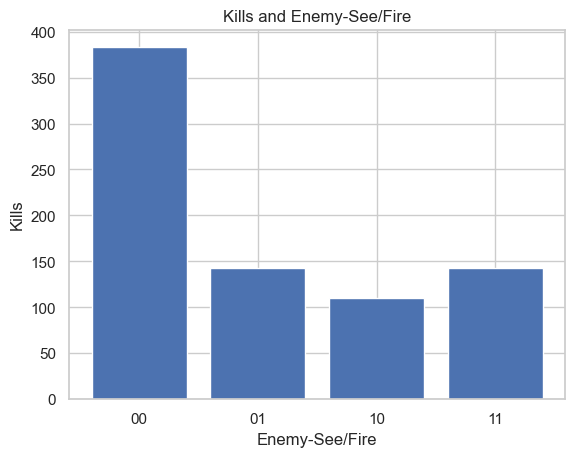

In [691]:
plt.bar(['00', '01', '10', '11'], [sum_00, sum_01, sum_10, sum_11])
plt.title('Kills and Enemy-See/Fire')
plt.xlabel('Enemy-See/Fire')
plt.ylabel('Kills')
plt.show()

In [692]:
# efficiency
sum_row_00 = kills_df[(kills_df['enemy-see-0-1'] == 0) & (kills_df['enemy-fire-0-1'] == 0)]['kill/dead'].shape[0]
sum_row_01 = kills_df[(kills_df['enemy-see-0-1'] == 0) & (kills_df['enemy-fire-0-1'] == 1)]['kill/dead'].shape[0]
sum_row_10 = kills_df[(kills_df['enemy-see-0-1'] == 1) & (kills_df['enemy-fire-0-1'] == 0)]['kill/dead'].shape[0]
sum_row_11 = kills_df[(kills_df['enemy-see-0-1'] == 1) & (kills_df['enemy-fire-0-1'] == 1)]['kill/dead'].shape[0]

print(f"sum_row_00: {sum_row_00}, efficiency: {sum_00/sum_row_00}")
print(f"sum_row_01: {sum_row_01}, efficiency: {sum_01/sum_row_01}")
print(f"sum_row_10: {sum_row_10}, efficiency: {sum_10/sum_row_10}")
print(f"sum_row_11: {sum_row_11}, efficiency: {sum_11/sum_row_11}")

sum_row_00: 207, efficiency: 1.8502415458937198
sum_row_01: 78, efficiency: 1.8333333333333333
sum_row_10: 79, efficiency: 1.3924050632911393
sum_row_11: 99, efficiency: 1.4444444444444444


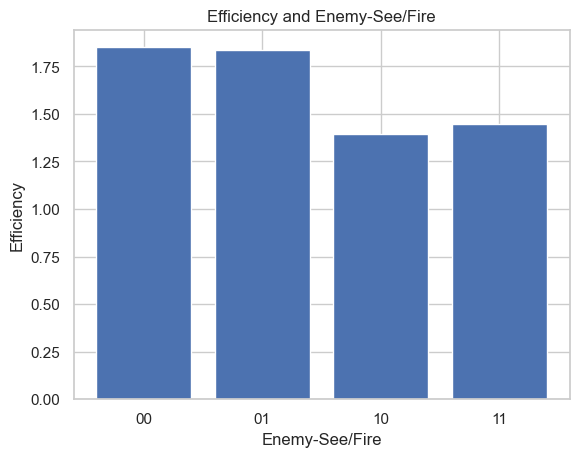

In [693]:
plt.bar(['00', '01', '10', '11'], [sum_00/sum_row_00, sum_01/sum_row_01, sum_10/sum_row_10, sum_11/sum_row_11])
plt.title('Efficiency and Enemy-See/Fire')
plt.xlabel('Enemy-See/Fire')
plt.ylabel('Efficiency')
plt.show()

In [694]:
# multiple kills and enemy-see/fire

multiple_kills_df = df[df["kill/dead"] > 1]
sum_00 = multiple_kills_df[(multiple_kills_df['enemy-see-0-1'] == 0) & (multiple_kills_df['enemy-fire-0-1'] == 0)]['kill/dead'].sum()
sum_01 = multiple_kills_df[(multiple_kills_df['enemy-see-0-1'] == 0) & (multiple_kills_df['enemy-fire-0-1'] == 1)]['kill/dead'].sum()
sum_10 = multiple_kills_df[(multiple_kills_df['enemy-see-0-1'] == 1) & (multiple_kills_df['enemy-fire-0-1'] == 0)]['kill/dead'].sum()
sum_11 = multiple_kills_df[(multiple_kills_df['enemy-see-0-1'] == 1) & (multiple_kills_df['enemy-fire-0-1'] == 1)]['kill/dead'].sum()

print(f"sum_00: {sum_00}, percentage: {sum_00/multiple_kills_sum}")
print(f"sum_01: {sum_01}, percentage: {sum_01/multiple_kills_sum}")
print(f"sum_10: {sum_10}, percentage: {sum_10/multiple_kills_sum}")
print(f"sum_11: {sum_11}, percentage: {sum_11/multiple_kills_sum}")

sum_00: 266, percentage: 0.5428571428571428
sum_01: 103, percentage: 0.21020408163265306
sum_10: 48, percentage: 0.09795918367346938
sum_11: 73, percentage: 0.1489795918367347


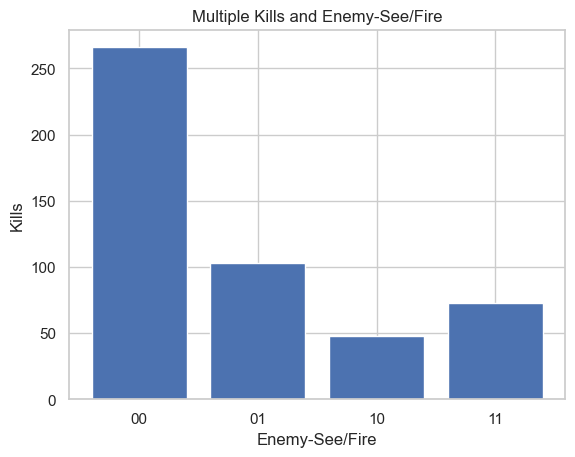

In [695]:
plt.bar(['00', '01', '10', '11'], [sum_00, sum_01, sum_10, sum_11])
plt.title('Multiple Kills and Enemy-See/Fire')
plt.xlabel('Enemy-See/Fire')
plt.ylabel('Kills')
plt.show()

# Enemy's orientation and kills

In [696]:
kills_df = df[df["kill/dead"] > 0]
sum_0 = kills_df[kills_df['pos-tw-e-0-1-2'] == 0]['kill/dead'].sum()
sum_1 = kills_df[kills_df['pos-tw-e-0-1-2'] == 1]['kill/dead'].sum()
sum_2 = kills_df[kills_df['pos-tw-e-0-1-2'] == 2]['kill/dead'].sum()

print(f"sum_0: {sum_0}, percentage: {sum_0/kills}")
print(f"sum_1: {sum_1}, percentage: {sum_1/kills}")
print(f"sum_2: {sum_2}, percentage: {sum_2/kills}")
print(f"sum_1+sum_2: {sum_1+sum_2}, percentage: {(sum_1+sum_2)/kills}")

sum_0: 339, percentage: 0.43517329910141206
sum_1: 264, percentage: 0.33889602053915274
sum_2: 176, percentage: 0.22593068035943517
sum_1+sum_2: 440, percentage: 0.5648267008985879


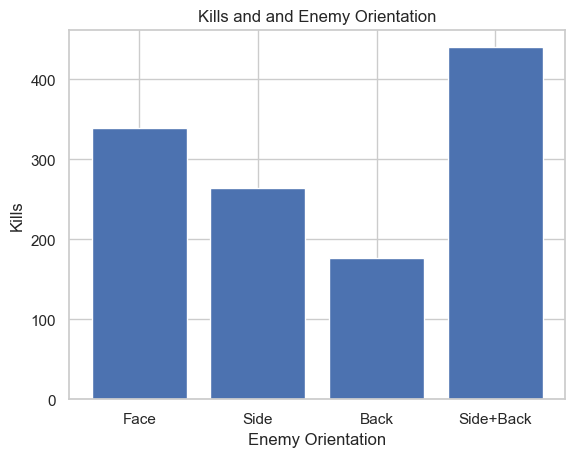

In [697]:
plt.bar(['Face', 'Side', 'Back', 'Side+Back'], [sum_0, sum_1, sum_2, sum_1+sum_2])
plt.title('Kills and and Enemy Orientation')
plt.xlabel('Enemy Orientation')
plt.ylabel('Kills')
plt.show()

In [698]:
# efficiency
sum_row_0 = kills_df[kills_df['pos-tw-e-0-1-2'] == 0]['kill/dead'].shape[0]
sum_row_1 = kills_df[kills_df['pos-tw-e-0-1-2'] == 1]['kill/dead'].shape[0]
sum_row_2 = kills_df[kills_df['pos-tw-e-0-1-2'] == 2]['kill/dead'].shape[0]

print(f"sum_row_0: {sum_row_0}, efficiency: {sum_0/sum_row_0}")
print(f"sum_row_1: {sum_row_1}, efficiency: {sum_1/sum_row_1}")
print(f"sum_row_2: {sum_row_2}, efficiency: {sum_2/sum_row_2}")
print(f"sum_row_1+sum_row_2: {sum_row_1+sum_row_2}, efficiency: {(sum_1+sum_2)/(sum_row_1+sum_row_2)}")

sum_row_0: 232, efficiency: 1.4612068965517242
sum_row_1: 147, efficiency: 1.7959183673469388
sum_row_2: 84, efficiency: 2.0952380952380953
sum_row_1+sum_row_2: 231, efficiency: 1.9047619047619047


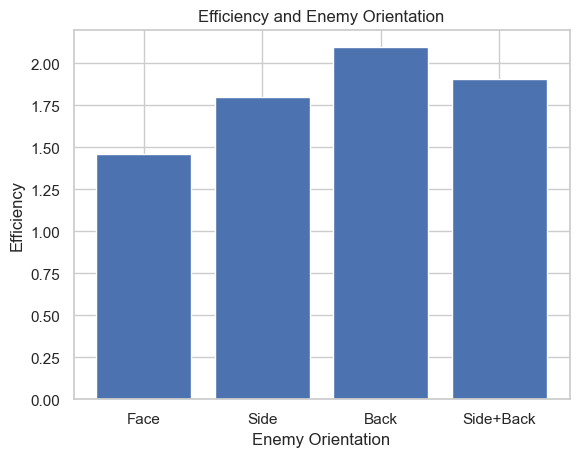

In [699]:
plt.bar(['Face', 'Side', 'Back', 'Side+Back'], [sum_0/sum_row_0, sum_1/sum_row_1, sum_2/sum_row_2, (sum_1+sum_2)/(sum_row_1+sum_row_2)])
plt.title('Efficiency and Enemy Orientation')
plt.xlabel('Enemy Orientation')
plt.ylabel('Efficiency')
plt.show()

In [700]:
# multiple kills and orientation
multiple_kills_df = df[df["kill/dead"] > 1]
sum_0 = multiple_kills_df[multiple_kills_df['pos-tw-e-0-1-2'] == 0]['kill/dead'].sum()
sum_1 = multiple_kills_df[multiple_kills_df['pos-tw-e-0-1-2'] == 1]['kill/dead'].sum()
sum_2 = multiple_kills_df[multiple_kills_df['pos-tw-e-0-1-2'] == 2]['kill/dead'].sum()

print(f"sum_0: {sum_0}, percentage: {sum_0/multiple_kills_sum}")
print(f"sum_1: {sum_1}, percentage: {sum_1/multiple_kills_sum}")
print(f"sum_2: {sum_2}, percentage: {sum_2/multiple_kills_sum}")
print(f"sum_1+sum_2: {sum_1+sum_2}, percentage: {(sum_1+sum_2)/multiple_kills_sum}")

sum_0: 176, percentage: 0.35918367346938773
sum_1: 178, percentage: 0.363265306122449
sum_2: 136, percentage: 0.27755102040816326
sum_1+sum_2: 314, percentage: 0.6408163265306123


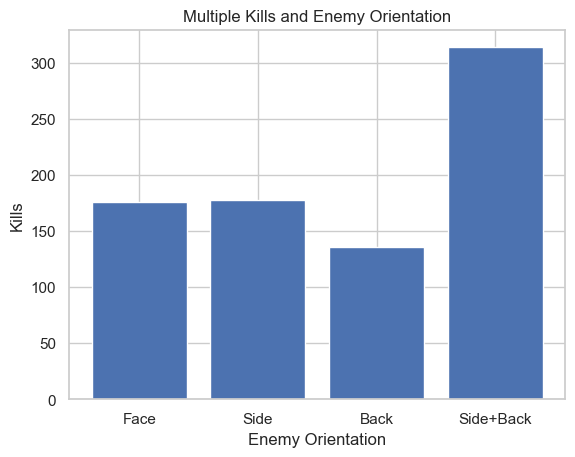

In [701]:
plt.bar(['Face', 'Side', 'Back', 'Side+Back'], [sum_0, sum_1, sum_2, sum_1+sum_2])
plt.title('Multiple Kills and Enemy Orientation')
plt.xlabel('Enemy Orientation')
plt.ylabel('Kills')
plt.show()

## T-test for orientation and kills

In [702]:
# t-test
from scipy import stats
group1 = kills_df[kills_df['pos-tw-e-0-1-2'] == 0]['kill/dead']
group2 = kills_df[(kills_df['pos-tw-e-0-1-2'] == 1) | (kills_df['pos-tw-e-0-1-2'] == 2)]['kill/dead']

print(stats.ttest_ind(group1, group2))

Ttest_indResult(statistic=-4.411023027419683, pvalue=1.281995265181169e-05)


# Frontline and kills

In [703]:
# frontline-0-1-2
kills_df = df[df["kill/dead"] > 0]
sum_0 = kills_df[kills_df['frontline-0-1-2'] == 0]['kill/dead'].sum()
sum_1 = kills_df[kills_df['frontline-0-1-2'] == 1]['kill/dead'].sum()
sum_2 = kills_df[kills_df['frontline-0-1-2'] == 2]['kill/dead'].sum()

print(f"sum_0: {sum_0}, percentage: {sum_0/kills}")
print(f"sum_1: {sum_1}, percentage: {sum_1/kills}")
print(f"sum_2: {sum_2}, percentage: {sum_2/kills}")
print(f"sum_1+sum_2: {sum_1+sum_2}, percentage: {(sum_1+sum_2)/kills}")

sum_0: 187, percentage: 0.24005134788189988
sum_1: 409, percentage: 0.5250320924261874
sum_2: 183, percentage: 0.23491655969191272
sum_1+sum_2: 592, percentage: 0.7599486521181001


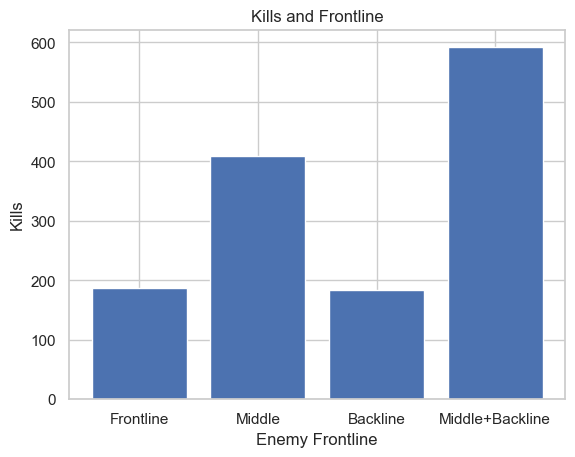

In [704]:
plt.bar(['Frontline', 'Middle', 'Backline', 'Middle+Backline'], [sum_0, sum_1, sum_2, sum_1+sum_2])
plt.title('Kills and Frontline')
plt.xlabel('Enemy Frontline')
plt.ylabel('Kills')
plt.show()

In [705]:
# efficiency
sum_row_0 = kills_df[kills_df['frontline-0-1-2'] == 0]['kill/dead'].shape[0]
sum_row_1 = kills_df[kills_df['frontline-0-1-2'] == 1]['kill/dead'].shape[0]
sum_row_2 = kills_df[kills_df['frontline-0-1-2'] == 2]['kill/dead'].shape[0]

print(f"sum_row_0: {sum_row_0}, efficiency: {sum_0/sum_row_0}")
print(f"sum_row_1: {sum_row_1}, efficiency: {sum_1/sum_row_1}")
print(f"sum_row_2: {sum_row_2}, efficiency: {sum_2/sum_row_2}")

sum_row_0: 149, efficiency: 1.25503355704698
sum_row_1: 226, efficiency: 1.8097345132743363
sum_row_2: 88, efficiency: 2.0795454545454546


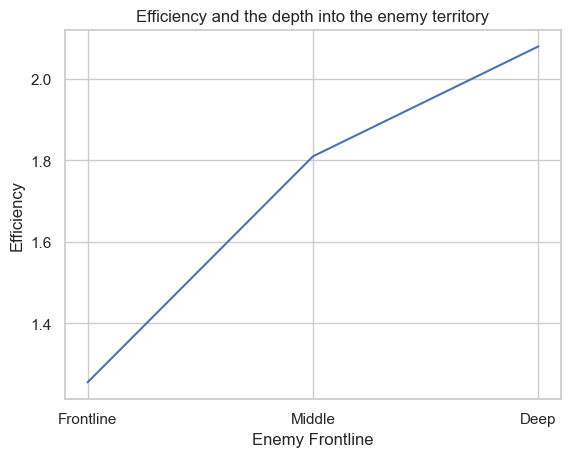

In [706]:
# using line to show the increase of efficiency
plt.plot(['Frontline', 'Middle', 'Deep'], [sum_0/sum_row_0, sum_1/sum_row_1, sum_2/sum_row_2])
plt.title('Efficiency and the depth into the enemy territory')
plt.xlabel('Enemy Frontline')
plt.ylabel('Efficiency')
plt.show()

# Frontline and Orientation


pos-tw-e-0-1-2     0   1   2
frontline-0-1-2             
0                 99  41   9
1                102  74  50
2                 31  32  25


Text(47.25, 0.5, 'Enemy Frontline')

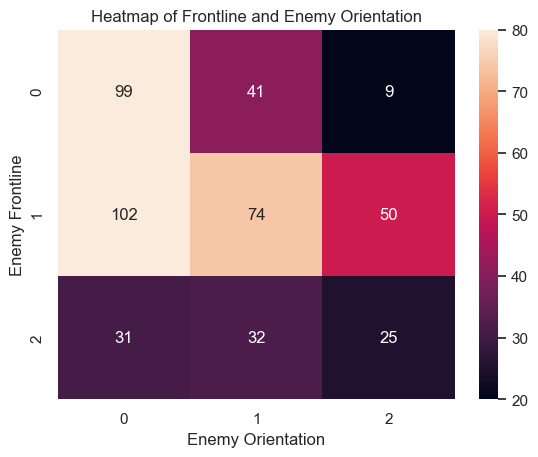

In [707]:
# heatmap to show their interconnection
heatmap_fr_pos_df = df[['frontline-0-1-2', 'pos-tw-e-0-1-2']]
heatmap_fr_pos_df = heatmap_fr_pos_df.groupby(['frontline-0-1-2', 'pos-tw-e-0-1-2']).size().unstack()
print(heatmap_fr_pos_df)

sns.heatmap(heatmap_fr_pos_df, annot=True, fmt="d", vmin=20,vmax=80)
plt.title('Heatmap of Frontline and Enemy Orientation')
plt.xlabel('Enemy Orientation')
plt.ylabel('Enemy Frontline')


In [708]:
df[['frontline-0-1-2', 'pos-tw-e-0-1-2']]

,frontline-0-1-2,pos-tw-e-0-1-2
0,0,0
1,1,1
2,1,2
3,0,0
4,2,1
...,...,...
458,2,0
459,1,0
460,1,0
461,1,2


# Teammates and kills

In [709]:
# quantity of kills
kills_df = df[df["kill/dead"] > 0]
sum_0 = kills_df[kills_df['near-team-0-1'] == 0]['kill/dead'].sum()
sum_1 = kills_df[kills_df['near-team-0-1'] == 1]['kill/dead'].sum()

print(f"sum_0: {sum_0}, percentage: {sum_0/kills}")
print(f"sum_1: {sum_1}, percentage: {sum_1/kills}")

sum_0: 505, percentage: 0.6482670089858793
sum_1: 274, percentage: 0.35173299101412064


In [710]:
# efficiency
sum_row_0 = kills_df[kills_df['near-team-0-1'] == 0]['kill/dead'].shape[0]
sum_row_1 = kills_df[kills_df['near-team-0-1'] == 1]['kill/dead'].shape[0]

print(f"sum_row_0: {sum_row_0}, efficiency: {sum_0/sum_row_0}")
print(f"sum_row_1: {sum_row_1}, efficiency: {sum_1/sum_row_1}")

sum_row_0: 249, efficiency: 2.0281124497991967
sum_row_1: 214, efficiency: 1.280373831775701


# T-test, self-status and kills

In [711]:
group1 = kills_df[kills_df['run-0-1'] == 0]['kill/dead']
group2 = kills_df[(kills_df['run-0-1'] == 1)]['kill/dead']

print(stats.ttest_ind(group1, group2))

Ttest_indResult(statistic=1.4182874901840883, pvalue=0.1567824797212122)


In [712]:
group1 = kills_df[kills_df['hp-0-1-2'] == 0]['kill/dead']
group2 = kills_df[(kills_df['hp-0-1-2'] == 1)]['kill/dead']

print(stats.ttest_ind(group1, group2))

Ttest_indResult(statistic=-1.3731841827526714, pvalue=0.17389830088401992)


In [713]:
group1 = kills_df[kills_df['ammo-0-1'] == 0]['kill/dead']
group2 = kills_df[(kills_df['ammo-0-1'] == 1)]['kill/dead']

print(stats.ttest_ind(group1, group2))

Ttest_indResult(statistic=-1.2854378651521057, pvalue=0.19928468597159651)


# T-test, enemy's status and kills

In [714]:
group1 = kills_df[kills_df['enemy-see-0-1'] == 0]['kill/dead']
group2 = kills_df[(kills_df['enemy-see-0-1'] == 1)]['kill/dead']

print(stats.ttest_ind(group1, group2))

Ttest_indResult(statistic=4.093436787893187, pvalue=5.0185344194133496e-05)


In [715]:
group1 = kills_df[kills_df['enemy-fire-0-1'] == 0]['kill/dead']
group2 = kills_df[(kills_df['enemy-fire-0-1'] == 1)]['kill/dead']

print(stats.ttest_ind(group1, group2))

Ttest_indResult(statistic=1.0232414900064288, pvalue=0.3067303199136705)
